In [1]:
import copy
import matplotlib.pyplot as plt
import numpy
import pandas
import plotly
import six
import tensorflow as tf

import CS230

In [2]:
file_paths = CS230.data.get_all_file_paths()

# experiment #2 - smallest possible network
- input: steering/brake/throttle
- output: discrete derivative x/y velocity

In [3]:
file_path = file_paths[0]
data_columns = copy.deepcopy(CS230.data.COLUMNS_HUMAN_INPUT)
data_columns.extend(['vxCG', 'pitchAngle'])
label_columns = ['deriv_vxCG', 'deriv_vyCG']

train_percent = 0.9
dev_percent = 0.05
test_percent = 0.05

df = CS230.data.load(file_path)
df = CS230.data.stride_rows(df, stride=50)
df.dropna(axis=0, inplace=True)
df = CS230.data.add_derivatives(df, stride=1)
df = CS230.data.clean_discontinuities(df, stride=1)

#df = tf.keras.utils.normalize(df, axis=0)  # TODO details

df_train, df_dev, df_test, data_columns, label_columns = CS230.data.get_data_sets(df, 
                                                            train_percent, dev_percent, test_percent, 
                                                            data_columns, label_columns)

In [4]:
df.head()

,time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,...,deriv_rollAngle,deriv_rollRate,deriv_vxCG,deriv_vyCG,deriv_wheelAccelFL,deriv_wheelAccelFR,deriv_wheelAccelRL,deriv_wheelAccelRR,deriv_yawAngle,deriv_yawRate
1359,67.95,5.0,0.9,0.0,32.8,1398,5.0,61445.05,36.585468,-121.754113,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1360,68.00,5.4,0.9,0.0,33.8,1410,5.0,61445.10,36.585470,-121.754115,...,-0.08,-1.14,-0.04,0.01,1.87,1.67,0.09,-2.93,0.04,0.03
1361,68.05,5.9,1.0,0.0,30.4,1404,5.0,61445.15,36.585471,-121.754117,...,0.03,3.39,-0.01,0.00,-0.69,-1.87,-0.19,5.46,0.05,0.33
1362,68.10,6.7,1.0,0.0,34.8,1380,5.0,61445.20,36.585473,-121.754120,...,0.12,1.89,-0.04,-0.01,-0.59,1.18,1.47,-1.19,0.06,-0.35
1363,68.15,7.1,1.0,0.0,40.7,1380,5.0,61445.25,36.585474,-121.754121,...,-0.17,-4.27,-0.06,-0.02,3.83,-2.55,0.10,0.47,0.01,-0.36


In [5]:
df_train[data_columns].head()

,data_brake,data_throttle,data_handwheelAngle,data_vxCG,data_pitchAngle
17902,0.5,0.9,-34.2,0.01,-0.79
19661,0.0,3.5,0.0,34.74,-0.37
23164,0.0,0.6,-8.9,28.74,2.65
4122,0.0,0.7,-33.0,-0.01,-0.78
18878,0.0,0.7,2.2,23.15,2.03


In [6]:
df_train[label_columns].head()

,label_deriv_vxCG,label_deriv_vyCG
17902,0.00,0.02
19661,-0.09,0.00
23164,-0.24,-0.01
4122,0.00,0.00
18878,-0.07,0.02


In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(len(data_columns), activation='relu'))

#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(len(data_columns), activation='relu'))

#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(label_columns), activation='sigmoid'))

In [8]:
optimizer = tf.train.AdamOptimizer(0.001)
#optimizer = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(
    optimizer=optimizer, 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
x_train = tf.cast(df_train[data_columns].values, tf.float32)
y_train = tf.cast(df_train[label_columns].values, tf.float32)

In [10]:
history = model.fit(x_train, y_train, epochs=20, steps_per_epoch=1000)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1569 - mean_absolute_error: 0.2147
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0115 - mean_absolute_error: 0.0654
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0106 - mean_absolute_error: 0.0599
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0104 - mean_absolute_error: 0.0576
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0103 - mean_absolute_error: 0.0563
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0555
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0550
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0547


Text(0.5, 0, 'epoch')

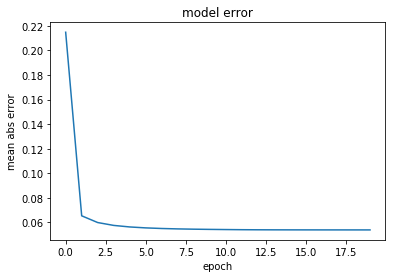

In [11]:
plt.plot(history.history['mean_absolute_error'])
#plt.plot(history.history['val_acc'])
plt.title('model error')
plt.ylabel('mean abs error')
plt.xlabel('epoch')

In [12]:
x_dev = tf.cast(df_dev[data_columns].values, tf.float32)
y_dev = tf.cast(df_dev[label_columns].values, tf.float32)

In [13]:
dev_predictions = model.predict(x_dev, steps=1)

In [14]:
df_dev_predictions = pandas.DataFrame(dev_predictions, columns=label_columns)

In [15]:
df_dev.head()

,data_brake,data_throttle,data_handwheelAngle,data_vxCG,data_pitchAngle,label_deriv_vxCG,label_deriv_vyCG
34572,0.0,28.8,60.2,19.79,0.48,0.16,0.13
24697,0.0,0.6,0.0,32.18,-1.75,-0.15,-0.01
1560,0.0,2.3,0.9,5.87,-0.27,0.03,-0.01
28372,4.2,0.3,-4.7,24.99,0.72,-0.25,0.00
21241,0.0,73.7,-2.1,38.49,-0.01,0.14,-0.06


In [16]:
df_dev_predictions.head()

,label_deriv_vxCG,label_deriv_vyCG
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [17]:
error = df_dev.reset_index(drop=True)[label_columns] - df_dev_predictions[label_columns]
error.head()

,label_deriv_vxCG,label_deriv_vyCG
0,0.16,0.13
1,-0.15,-0.01
2,0.03,-0.01
3,-0.25,0.00
4,0.14,-0.06
